1. Generate 2 blobs with sklearns make_blobs(n_samples=150, centers=2, n_features=2, cluster_std=0.5, random_state=0)
    a) Look at the dataset (Show the first line of the matrix)
    b) Print the target
2. Scatterplot the dataset with matplotlib
    a) Use different colors for each of the n_features=, created in the blob data. - I use red and green
3. Use the activation_function and perceptron fuction given in the 12-1-Perceptron-Classifier
4. Use the pla function given in the 12-1-Perceptron-Classifier
5. In exercise 1.b we found out that our data_blob set only contains 1 and 0 as target values
    a) Turn all the 0's into -1's. Now when we print our target, we should only have, 1 and -1
    b) Turn all the new targets with our daata into an array that has the following format;
    [(array([data.x, data.y]), 1), (array([data.x, data.y]), -1)]
    Note that the 1 and -1 are our target values
6. Using the pla function that we used copied in before, find the learned_weights of our training data from 5.b
7. Use the predict function given in 12-1-Perceptron-Classifier
    a) Try to see if we can predict a couple of values to be either 1 or -1
8. Visualize the linear seperability by using the compute_line function given in 12-1-Perceptron-Classifier

In [2]:
from sklearn import datasets
from sklearn.datasets import make_blobs

data, target = make_blobs(n_samples=150, centers=2, n_features=2, cluster_std=0.5, random_state=0)
print(data[0:1,:])
print(target)

[[2.4484315  0.66445411]]
[1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0
 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1
 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1
 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1
 0 1]


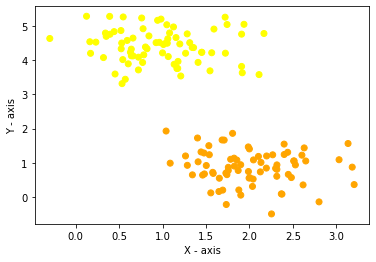

In [4]:
import matplotlib.colors as colors
import matplotlib.pyplot as plt

col = "yellow orange".split()
x = data[:,0]
y = data[:,1]

plt.scatter(x, y, c=target, cmap=colors.ListedColormap(col))
plt.ylabel("Y - axis")
plt.xlabel("X - axis")
plt.show()

In [11]:
def activation_function(x):
    if x < 0:
        return -1
    else:
        return 1

def perceptron(inp, weights):
    dot_product = sum([i * w for i, w in zip(inp, weights)])
    output = activation_function(dot_product)
    return output

In [8]:
import numpy as np
import pdb

def pla(training_data, no_iterations=10000, eta=0.5):
    dim = len(training_data[0][0]) # len = 2 (petal width and height)
    weights =  np.random.random(dim) # error and weights (for x and y) start out as random numbers
    
    # initial_error
    error = np.random.random()
    weight_history = [np.copy(weights)]

    for i in range(no_iterations):
        #pdb.set_trace()
        #breakpoint()
        inp_vec, expected_label = training_data[i % len(training_data)] # get the next feature set and label (start over after reaching end)
        perceptron_output = perceptron(inp_vec, weights) # perceptron output id a decimal between 0 and 1
        error = expected_label - perceptron_output       # error 
        weights += eta * error * inp_vec # accumulate the weights
        weight_history.append(np.copy(weights))
        
    return weights, weight_history

In [9]:
target[target == 0] = -1
print(target)

trainings_data_blobs = [(dat, tar) for dat, tar in zip(data, target)]

[ 1 -1 -1 -1  1  1 -1 -1  1 -1 -1  1  1  1  1 -1 -1  1  1  1 -1 -1 -1  1
  1 -1  1  1  1  1  1 -1 -1  1  1  1 -1  1 -1  1 -1  1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1
 -1  1 -1 -1  1  1 -1 -1  1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1
 -1 -1 -1  1  1 -1  1  1  1 -1 -1 -1  1 -1  1  1 -1  1 -1 -1  1  1 -1  1
 -1 -1  1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1 -1  1 -1 -1  1 -1  1  1
  1  1 -1  1 -1  1]


In [12]:
learned_weights, weight_history = pla(trainings_data_blobs)
print(learned_weights)

[ 18.29529392 -13.13456948]


In [17]:
def predict(inp_vec, weights):
    class_label_prediction = perceptron(inp_vec, weights)
    return class_label_prediction

print(predict([1, 2], learned_weights))
print(predict([1, 3], learned_weights))
print(predict([6, 4], learned_weights))

-1
-1
1


slope: 1.3929115795475826 bias 0.8123345315739345
(1.3929115795475826, 0.8123345315739345)


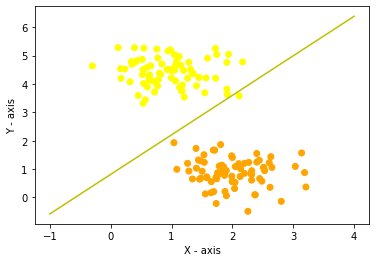

In [31]:
# 8 Visualize the linear seperability by using the "compute_line" function given in "12-1-Perceptron-Classifier".
def compute_line(weights):
    norm = np.linalg.norm(weights) # calculating the frobenius norm adjusting values measured on different scales to a notionally common scale
    ww = weights / norm # weight vector is perpendicular (or othogonal) to the division line
    ww1 = [ww[1], -ww[0]] # first point on our division line
    ww2 = [-ww[1] , ww[0]] # second point on our division line
    # slope and intercept
    m = (ww2[1] - ww1[1]) / (ww2[0] - ww1[0]) # slope = delta y / delta x
    b = ((ww2[0] - ww1[0]) * m) + ww1[1]      # intercept = delta x * slope + y(x1)
    print('slope:',m,'bias',b)
    return m, b


print(compute_line(learned_weights))
plt.scatter(x, y, c=target, cmap=colors.ListedColormap(col))

l = np.linspace(-1.0, 4)
plt.plot(l, m * l + b, 'y-')

plt.ylabel("Y - axis")
plt.xlabel("X - axis")
plt.show()